In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay



In [67]:
# read Csv file
df = pd.read_csv('winequality-red.csv')

In [68]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [69]:
df.shape

(1599, 12)

In [70]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [71]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [72]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [73]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

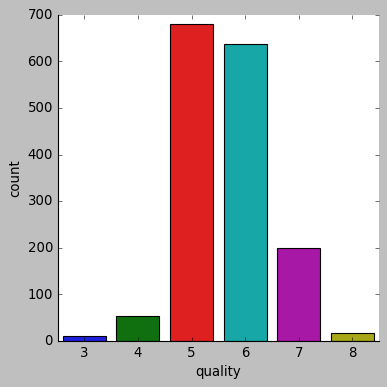

In [74]:
sns.catplot(x="quality",data=df,kind='count')
plt.show

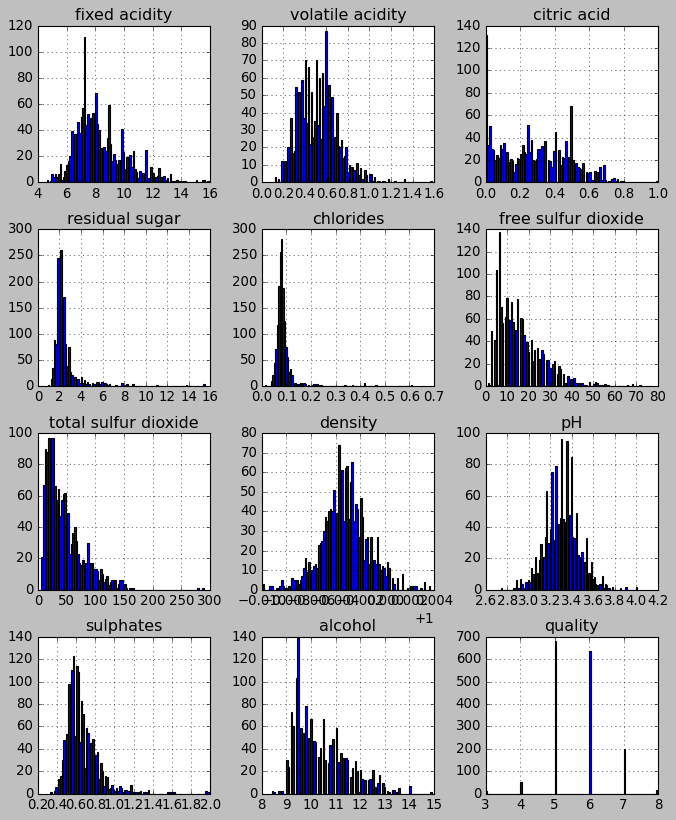

In [75]:
df.hist(bins=100,figsize=(10,12))
plt.show()

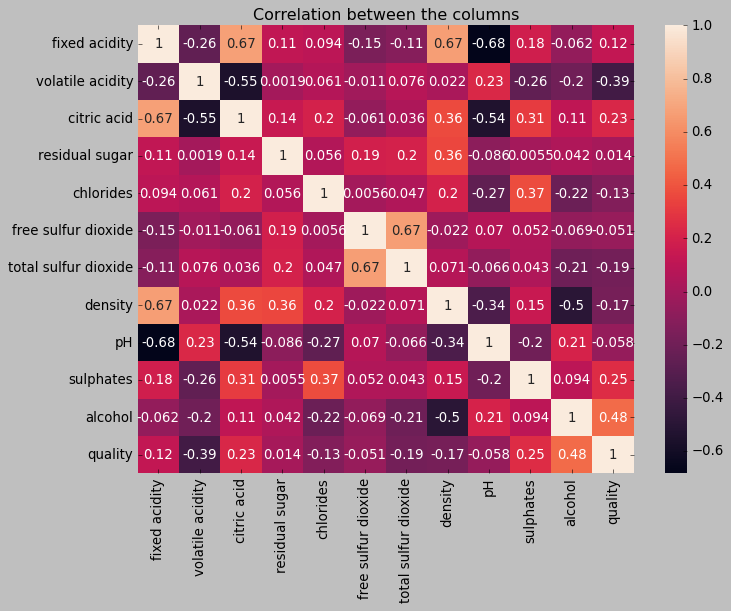

In [76]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot = True)
plt.title('Correlation between the columns')
plt.show()

In [77]:
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<Axes: xlabel='quality', ylabel='alcohol'>

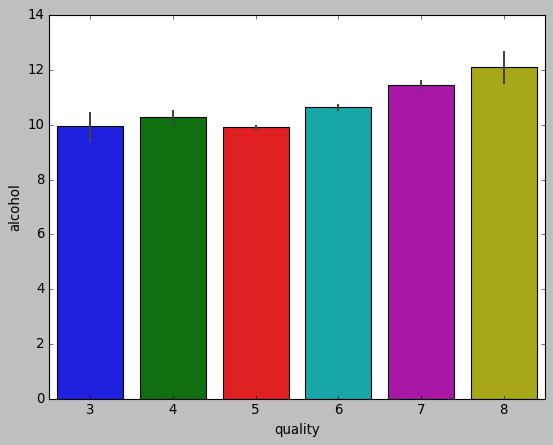

In [78]:
sns.barplot(x='quality',y='alcohol',data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

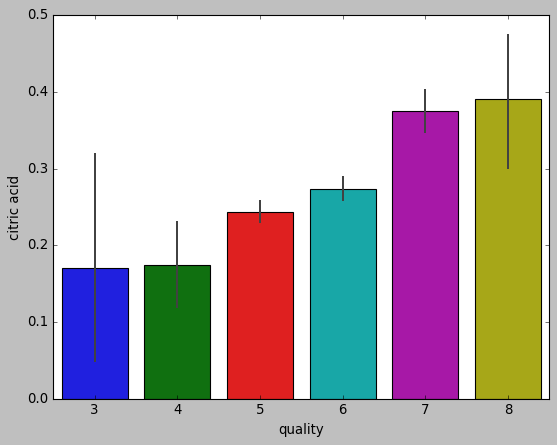

In [79]:
sns.barplot(x='quality',y='citric acid',data = df)

In [80]:
correlation = df.corr()

In [81]:
x = df.drop('quality',axis=1)

In [82]:
y = df['quality'].apply(lambda y_value: 1 if y_value>7 else 0)

In [83]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [85]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (1279, 11)
y_train (1279,)
x_test (320, 11)
y_test (320,)


In [86]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print("test accuracy is:{:2f}%".format(logreg_acc*100))

test accuracy is:98.437500%


In [87]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       315
           1       0.00      0.00      0.00         5

    accuracy                           0.98       320
   macro avg       0.49      0.50      0.50       320
weighted avg       0.97      0.98      0.98       320



TN: 315
FN: 5
TP: 0
FP: 0


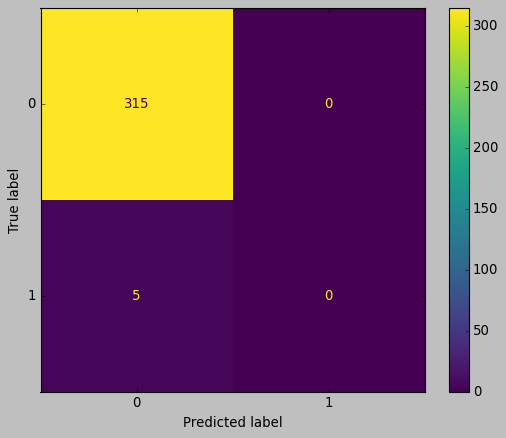

In [88]:
style.use('classic')
cm = confusion_matrix(y_test,logreg_pred,labels=logreg.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix= cm,display_labels= logreg.classes_)
disp.plot()
print("TN:",cm[0][0])
print("FN:",cm[1][0])
print("TP:",cm[1][1])
print("FP:",cm[0][1])

In [89]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtree_pred = dtree.predict(x_test)
dtree_acc = accuracy_score(logreg_pred,y_test)
print("test accuracy is:{:2f}%".format(dtree_acc*100))

test accuracy is:98.437500%


In [90]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       315
           1       0.25      0.20      0.22         5

    accuracy                           0.98       320
   macro avg       0.62      0.60      0.61       320
weighted avg       0.98      0.98      0.98       320



TN: 312
FN: 4
TP: 1
FP: 3


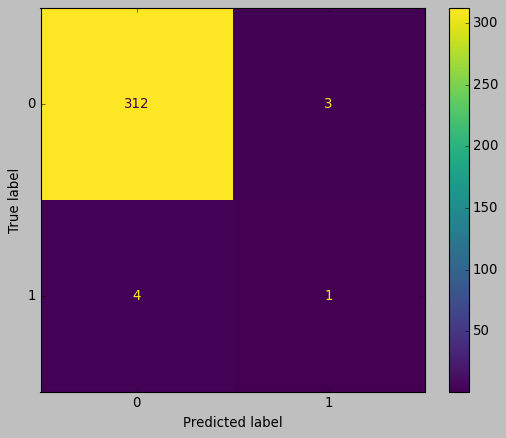

In [91]:
style.use('classic')
cm = confusion_matrix(y_test,dtree_pred,labels=dtree.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix= cm,display_labels= dtree.classes_)
disp.plot()
print("TN:",cm[0][0])
print("FN:",cm[1][0])
print("TP:",cm[1][1])
print("FP:",cm[0][1])

In [92]:
rforest = RandomForestClassifier()
rforest.fit(x_train,y_train)
rforest_pred = rforest.predict(x_test)
rforest_acc = accuracy_score(rforest_pred,y_test)
print("test accuracy is:{:2f}%".format(rforest_acc*100))

test accuracy is:98.437500%


In [93]:
print(classification_report(y_test,rforest_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       315
           1       0.00      0.00      0.00         5

    accuracy                           0.98       320
   macro avg       0.49      0.50      0.50       320
weighted avg       0.97      0.98      0.98       320



TN: 315
FN: 5
TP: 0
FP: 0


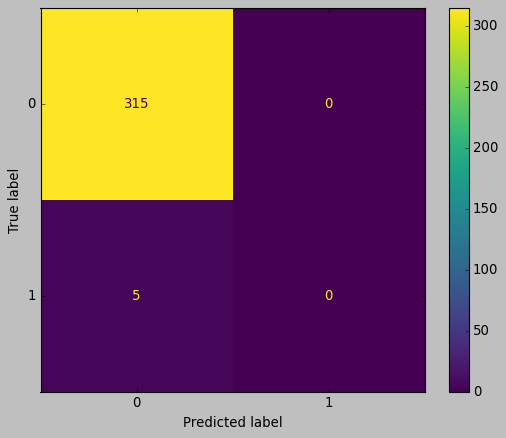

In [94]:
style.use('classic')
cm = confusion_matrix(y_test,rforest_pred,labels=rforest.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix= cm,display_labels= rforest.classes_)
disp.plot()
print("TN:",cm[0][0])
print("FN:",cm[1][0])
print("TP:",cm[1][1])
print("FP:",cm[0][1])